In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
assert(X_train.shape[0] == y_train.shape[0]),'The number of images are not equal to number of labels'
assert(X_test.shape[0] == y_test.shape[0]),'The number of images are not equal to number of labels'
assert(X_train.shape[1:] == (28,28)),'The pixels size is not 28X28'
assert(X_test.shape[1:] == (28,28)),'The pixels size is not 28X28'

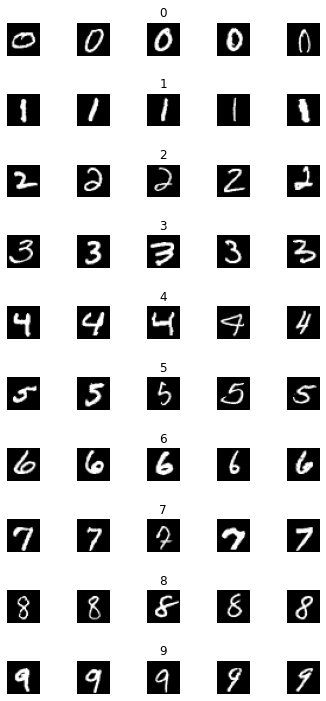

In [5]:
n_samples = []
cols = 5
n_classes = 10
fig,ax = plt.subplots(nrows = n_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(n_classes):
        x_selected = X_train[y_train == j]
        ax[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:], cmap = plt.get_cmap('gray'))
        ax[j][i].axis('off')
        if i == 2:
            ax[j][i].set_title(str(j))
            n_samples.append(len(x_selected))

Text(0.5, 0, 'number of classes')

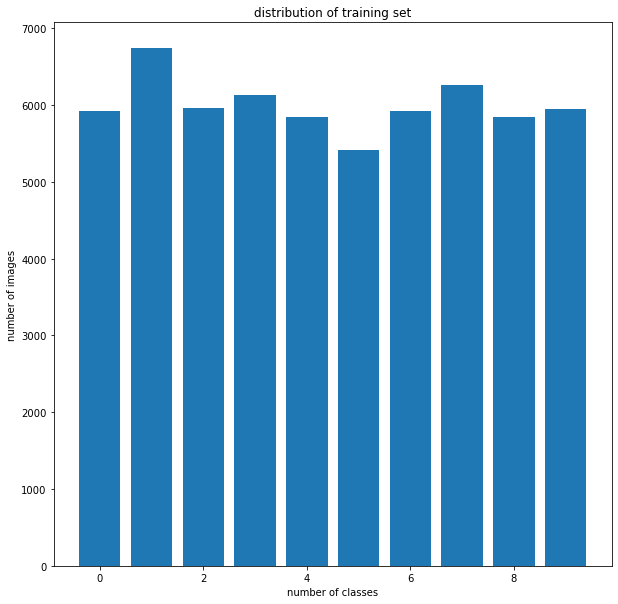

In [134]:
plt.figure(figsize = (10,10))
plt.bar(range(0, n_classes), n_samples)
plt.title('distribution of training set')
plt.ylabel('number of images')
plt.xlabel('number of classes')

In [135]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [136]:
X_train = X_train/255
X_test = X_test/255

In [137]:
n_pixels = 784
X_train = X_train.reshape(X_train.shape[0], n_pixels)
X_test = X_test.reshape(X_test.shape[0], n_pixels)

In [183]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = n_pixels, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(n_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [184]:
model = create_model()
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_55 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_56 (Dense)             (None, 10)                510       
Total params: 8,910
Trainable params: 8,910
Non-trainable params: 0
_________________________________________________________________
None


In [185]:
h =  model.fit(X_train, y_train, validation_split = 0.1, verbose = 0, batch_size = 200, epochs = 10, shuffle = 'true' )

Text(0, 0.5, 'accuracy')

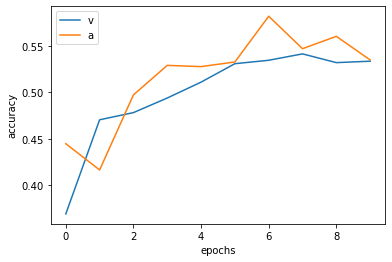

In [186]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend('accurcy')
plt.legend('val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

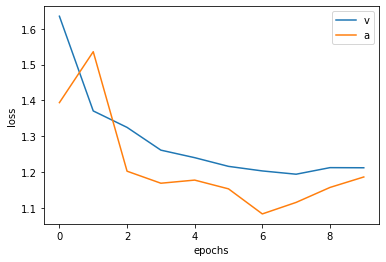

In [187]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend('accurcy')
plt.legend('val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')

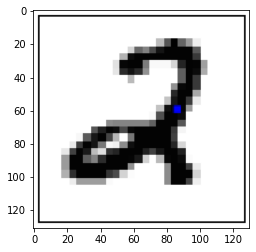

In [188]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img, cmap = plt.get_cmap('gray'))

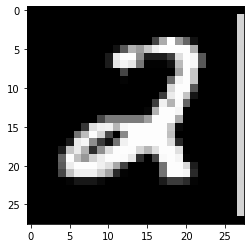

In [189]:
img_array = np.asarray(img)
import cv2 as cv
resized = cv.resize(img_array,(28,28))
gry = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
bit = cv.bitwise_not(gry)
plt.imshow(bit, cmap = plt.get_cmap('gray'))

In [190]:
bit = bit/255
bit = bit.reshape(1,784)

In [191]:
prediction = model.predict_classes(bit)
print('prediction is:', prediction)

prediction is: [0]


In [192]:
score = model.evaluate(X_test,y_test, verbose = 0)
print('The evaluation of loss function is:',score[0])
print('The test accuracy is', score[1])

The evaluation of loss function is: 1.2303999662399292
The test accuracy is 0.5157999992370605
